## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
#loading libraries + tests
import numpy as np
from scipy.stats import chisquare  # One-way chi square test
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel,  t, ttest_1samp
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt






In [4]:
#Getting data using bash command !

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-12-11 04:00:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-12-11 04:00:53 (615 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [6]:
#reading in csv and declaring dataframe variable, naming columns correctly
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [7]:
#Calling the Sum of all null/NaN values by column and sorting from least to greatest 

df.isnull().sum().sort_values()

#Checking again because I *know* there are missing values
df.isnull().values.any()

False

In [8]:
#using melt to tidy dataset, changing column headers to fall under column 'Issue' + to create the Vote column
#Sorting new formatted df

formatted_df = pd.melt(df,
                       ["party"],
                       var_name="Issue",
                       value_name="Vote")
formatted_df.head()

,party,Issue,Vote
0,republican,handicapped-infants,n
1,republican,handicapped-infants,n
2,democrat,handicapped-infants,?
3,democrat,handicapped-infants,n
4,democrat,handicapped-infants,y


#Objective 1: 
##Generate and numerically represent a confidence interval

In [0]:

#declaring relevant variables to use with testing


#creating a function that calculates the confidence interval for the observations of congressional voting data
#using t-distribution and two tailed test, default 95% confidence
#returning tuple of (mean, lower bound, upper bound)
 
def confidence_interval(dem, confidence=0.95):
  formatted_df = np.array(dem)
  mean = np.mean(formatted_df)
  n = len(formatted_df)
  stderr = stats.sem(formatted_df)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)


In [71]:
either_or = np.random.binomial(n=1, p=.5, size=50)
either_or

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1])

In [66]:
confidence_interval(either_or)

(0.6, 0.45935903073621664, 0.7406409692637833)

#Objective 2:
##Graphically (with a plot) represent the confidence interval

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


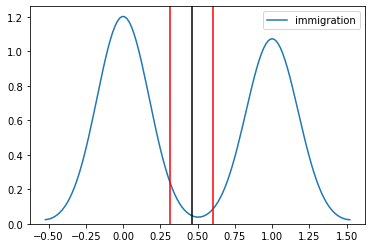

In [73]:
#Visual representation of confidence interval
sns.kdeplot(dem['immigration'])
# CI = confidence_interval(either_or)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

In [0]:
#Still confused -- Ask for help during TL hours *****
# Interpret the confidence interval - what does it tell you about the data and its distribution?

In [9]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

# #Replacing all '?' values with 'Other' to more accurately convey the Values
# formatted_df.replace(to_replace ="?", 
#                  value ="Other")

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
#filtering formatted_df into two separate dataframes
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [11]:
#checking out my new dataframes
dem.head()
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#checking out my new dataframes
rep.head()
rep.describe()


,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Getting a count of each y or n vote on each issue based on party to help make assumptions for T-tests
count = formatted_df.groupby(['Issue', 'Vote', 'party']).size() 
# print(count)

In [14]:
count.head(10)

Issue               Vote  party     
aid-to-contras      ?     democrat        4
                          republican     11
                    n     democrat       45
                          republican    133
                    y     democrat      218
                          republican     24
anti-satellite-ban  ?     democrat        8
                          republican      6
                    n     democrat       59
                          republican    123
dtype: int64

In [0]:
# Confidence Intervals:
# Generate and numerically represent a confidence interval
# Graphically (with a plot) represent the confidence interval
# Interpret the confidence interval - what does it tell you about the data and its distribution?
# Chi-squared tests:
# Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
# By hand using Numpy
# In a single line using Scipy

In [51]:
ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


#Objective 4:
##Run Chi^2 Test with previously used dataset on two categorical variables by hand



In [34]:
#TLHOURS DO I NEED TO PICK A DIFFERENT DATASET?
#creating a crosstab with the formatted_df I tidied yesterday
crosstab = pd.crosstab(formatted_df['party'], formatted_df['Issue'], margins=True)

crosstab

Issue,aid-to-contras,anti-satellite-ban,budget,crime,duty-free,education,el-salvador-aid,handicapped-infants,immigration,mx-missile,physician-fee-freeze,religious-groups,right-to-sue,south-africa,synfuels,water-project,All
party,,,,,,,,,,,,,,,,,
democrat,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,4272
republican,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,2688
All,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,6960


In [38]:
# (contingency table)
observed = pd.crosstab(formatted_df['party'], formatted_df['Issue'])

observed

Issue,aid-to-contras,anti-satellite-ban,budget,crime,duty-free,education,el-salvador-aid,handicapped-infants,immigration,mx-missile,physician-fee-freeze,religious-groups,right-to-sue,south-africa,synfuels,water-project
party,,,,,,,,,,,,,,,,
democrat,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267
republican,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168


In [42]:
# Grabbing the crosstab cells that correspond to the republican vote count
republicancount = formatted_df.iloc[0][0:6].values
republicancount

array(['republican', 'handicapped-infants', 'n'], dtype=object)

In [40]:
# Grabbing the crosstab cells that correspond to the democrat vote count
democratcount = crosstab.iloc[1][0:6].values
democratcount 

array([168, 168, 168, 168, 168, 168])

In [49]:
#Creating variables to hold calculations of row and column totals to use in the expected value calculations

row_sums = crosstab.iloc[0:2, 6].values
col_sums = crosstab.iloc[2, 0:6].values



# Grabbing sample size from the crosstab 
total = crosstab.loc['All','All']
total

#calculating table of expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)


# Checking to see if the shape of the table matches the contingency table (crosstab)
print(expected.shape)  
# The expected table here should match the table reported by scipy, or else
# we have made a mistake.
print(expected)

(2, 6)
[[16.6875 16.6875 16.6875 16.6875 16.6875 16.6875]
 [10.5    10.5    10.5    10.5    10.5    10.5   ]]


In [78]:
#The observed table matches contingency table (crosstab) + 


observed = pd.crosstab(dem['immigration'], dem['immigration']).values
print(observed.shape)
observed


(2, 2)


array([[139,   0],
       [  0, 124]])

#Objective 5:
##Run Chi^2 Test with previously used dataset on two categorical variables in a single line using Scipy

In [74]:
#Since the above Observed and Expected vallues are the same shape they are easily subtracted and divided 
#Therefore no forloop is necessary, = Array Broadcasting

chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")



ValueError: ignored

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)